In [12]:
# 读取 鲍鱼数据集.csv
data = []
with open('鲍鱼数据集.csv') as f:
    for line in f:
        data.append(line.strip().split(','))

# 将数据转化为浮点数
# 第一列是由M F I代表的性别
# 只保留M
data = [[float(x) for x in line[1:]] for line in data if line[0] == 'F']


# data 转化为numpy数组
import numpy as np
data = np.array(data)

# 保存最后一列作为标签
label = data[:, -1]
# 删除最后一列
data = data[:, :-1]





c:\Users\quezi\.conda\envs\weibodatacleaning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\quezi\.conda\envs\weibodatacleaning\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\quezi\.conda\envs\weibodatacleaning\lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 2000 with accuracies 
[2.72746503e-14 5.03152456e-06 2.74176072e-06 1.11592789e-05]
not reaching the requested tolerance 1.9669532775878906e-06.
Use iteration 1985 instead with accuracy 
2.7870438032623824e-06.

  _, diffusion_map = lobpcg(
c:\Users\quezi\

[[-0.345821    1.28725   ]
 [17.379114    1.8668118 ]
 [-0.36225292  1.284819  ]
 [-0.3611718   1.2823609 ]
 [-3.3664293   0.6301739 ]]
[ 8 19  8 ... 15 11 18]
[15.  7. 10. ... 10.  9. 12.]


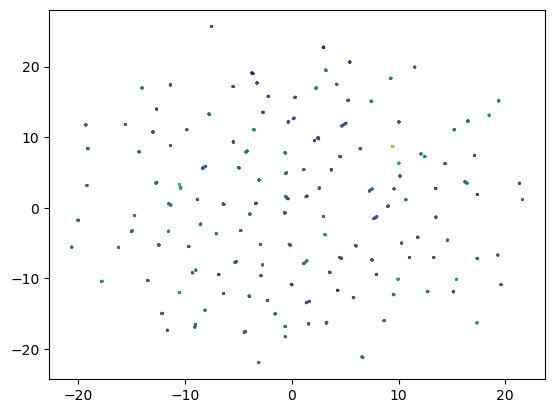

0.06609947643979057


In [21]:
# 进行KMeans聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

# 降维 使用umap
import umap
data = umap.UMAP().fit_transform(data)
print(data[:5])

# 可视化
import matplotlib.pyplot as plt
# plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=1, cmap='viridis')
# plt.show()
print(y_kmeans)
print(label)
plt.scatter(data[:, 0], data[:, 1], c=label, s=1, cmap='viridis')
plt.show()

# 对比 label 和 y_kmeans
# 计算正确率
from sklearn.metrics import accuracy_score
print(accuracy_score(label, y_kmeans))


In [20]:
label
di = {}
for i in range(len(label)):
    if label[i] not in di:
        di[label[i]] = 1
    else:
        di[label[i]] += 1
print(di)

{15.0: 52, 7.0: 80, 10.0: 294, 9.0: 278, 11.0: 225, 12.0: 118, 18.0: 18, 8.0: 172, 13.0: 91, 21.0: 6, 14.0: 56, 6.0: 27, 19.0: 15, 17.0: 25, 16.0: 30, 22.0: 3, 20.0: 12, 26.0: 1, 23.0: 3, 5.0: 11, 4.0: 6, 3.0: 3, 27.0: 1, 24.0: 1}
